In [ ]:
Импортируйте библиотеки pandas, numpy и matplotlib.
Загрузите "Boston House Prices dataset" из встроенных наборов 
данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.
Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.
Масштабируйте данные с помощью StandardScaler.
Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
import warnings
from sklearn.model_selection import train_test_split

In [3]:
warnings.filterwarnings("ignore")
boston = load_boston()

In [4]:
data = boston["data"]

feature_names = boston["feature_names"]

target = boston["target"]

x = pd.DataFrame(data, columns=feature_names)

x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [34]:
y = pd.DataFrame(target, columns=["price"])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=42 )

In [7]:
from sklearn.preprocessing import StandardScaler

In [35]:
scaler = StandardScaler(with_mean=False)

x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train))
x_test_scaled = pd.DataFrame(scaler.transform(x_test))

In [10]:
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)
x_train_tsne = tsne.fit_transform(x_train_scaled)

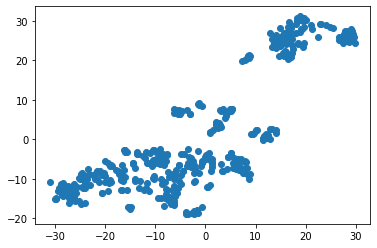

In [14]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

plt.show()

In [ ]:
С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.
Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.
Вычислите средние значения price и CRIM в разных кластерах.

In [16]:
from sklearn.cluster import KMeans

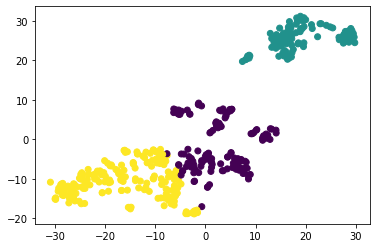

In [25]:
kmeans = KMeans(n_clusters=3,max_iter=100,random_state=42)

labels_train = kmeans.fit_predict(x_train_tsne)

plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)

plt.show()

In [38]:
print(f'цена первого сектора ->{y_train.loc[labels_train==0].mean()}')
print(f'CRIM первого сектора ->{x_train.loc[labels_train==0,"CRIM"].mean()}')
print(f'цена второго сектора ->{y_train.loc[labels_train==1].mean()}')
print(f'CRIM второго сектора ->{x_train.loc[labels_train==1,"CRIM"].mean()}')
print(f'цена третье сектора ->{y_train.loc[labels_train==2].mean()}')
print(f'CRIM третье сектора ->{x_train.loc[labels_train==2,"CRIM"].mean()}')        

цена первого сектора ->price    20.470769
dtype: float64
CRIM первого сектора ->0.7839846153846154
цена второго сектора ->price    16.277228
dtype: float64
CRIM второго сектора ->13.17982178217822
цена третье сектора ->price    28.350289
dtype: float64
CRIM третье сектора ->0.14454537572254336


In [ ]:
Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [39]:
labels_train = kmeans.fit_predict(x_test)
print(f'цена первого сектора ->{y_test.loc[labels_train==0].mean()}')
print(f'CRIM первого сектора ->{x_test.loc[labels_train==0,"CRIM"].mean()}')
print(f'цена второго сектора ->{y_test.loc[labels_train==1].mean()}')
print(f'CRIM второго сектора ->{x_test.loc[labels_train==1,"CRIM"].mean()}')
print(f'цена третье сектора ->{y_test.loc[labels_train==2].mean()}')
print(f'CRIM третье сектора ->{x_test.loc[labels_train==2,"CRIM"].mean()}')   

цена первого сектора ->price    23.911594
dtype: float64
CRIM первого сектора ->0.24642115942028991
цена второго сектора ->price    17.392308
dtype: float64
CRIM второго сектора ->8.469301923076923
цена третье сектора ->price    12.814286
dtype: float64
CRIM третье сектора ->19.021665714285714
